In [4]:
import pandas as pd
data=pd.read_csv("Drug.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

In [6]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na             float64
K              float64
Drug            object
dtype: object

Training and evaluating with linear kernel...
Accuracy with linear kernel: 0.975
Confusion Matrix:
 [[ 5  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Training and evaluating with rbf kernel...
Accuracy with rbf kernel: 0.875
Confusion Matrix:
 [[ 4  1  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  3  1  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]
Training and evaluating with poly kernel...
Accuracy with poly kernel: 0.725
Confusion Matrix:
 [[ 2  1  0  0  3]
 [ 0  2  0  0  1]
 [ 0  0  1  1  3]
 [ 0  1  0  9  1]
 [ 0  0  0  0 15]]
Training and evaluating with sigmoid kernel...
Accuracy with sigmoid kernel: 0.925
Confusion Matrix:
 [[ 5  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  4  0  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]


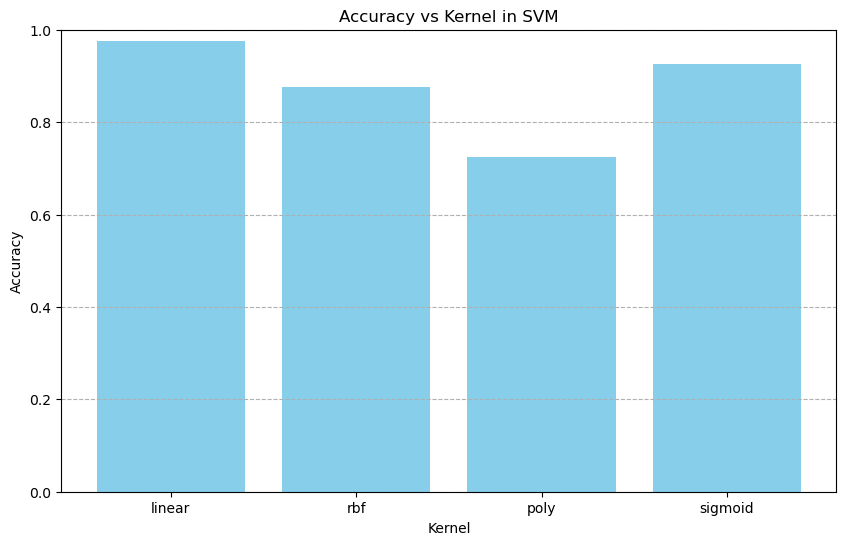

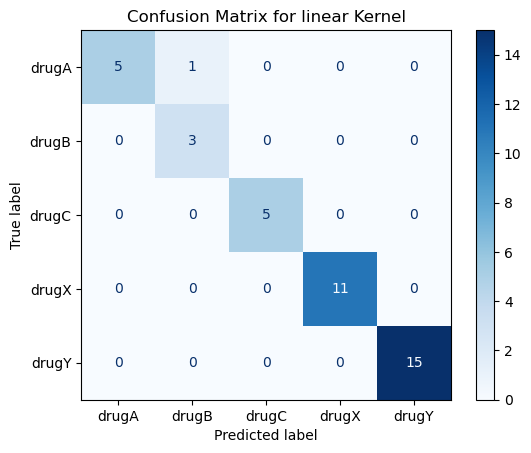

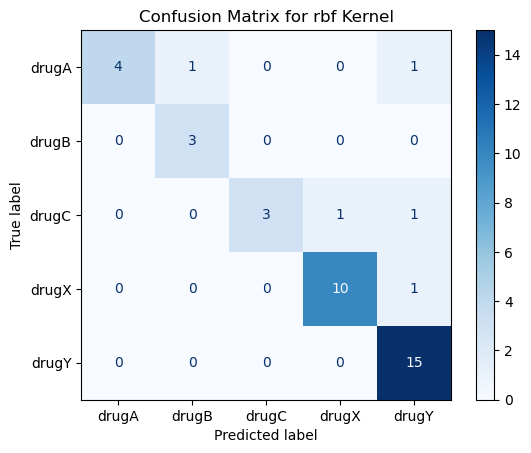

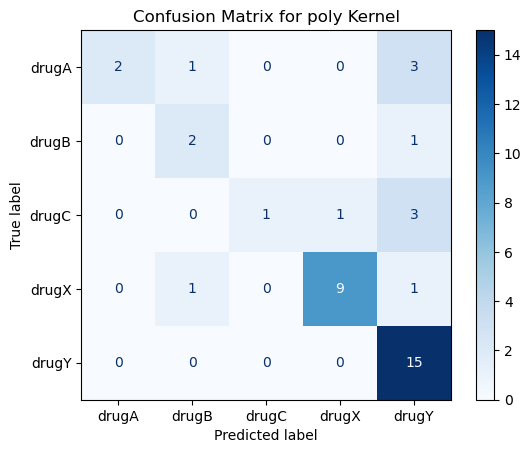

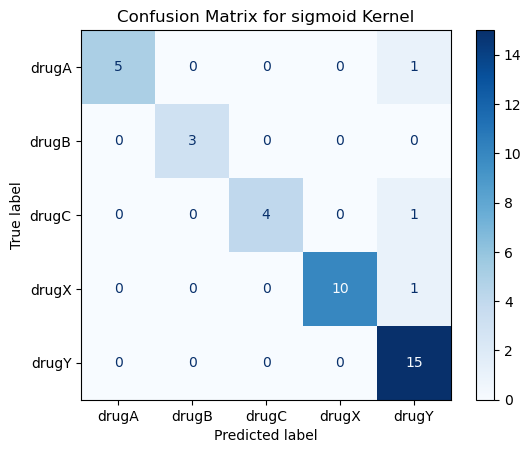

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
le_bp = LabelEncoder()
data['BP'] = le_bp.fit_transform(data['BP'])
le_cholesterol = LabelEncoder()
data['Cholesterol'] = le_cholesterol.fit_transform(data['Cholesterol'])
X = data.drop('Drug', axis=1)
y = data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracies = []
confusion_matrices = {}
for kernel in kernels:
    print(f"Training and evaluating with {kernel} kernel...")
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[kernel] = cm
    print(f'Accuracy with {kernel} kernel: {accuracy}')
    print("Confusion Matrix:\n", cm)
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.title('Accuracy vs Kernel in SVM')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.show()
# Plot confusion matrices
for kernel in kernels:
    cm = confusion_matrices[kernel]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))  # Use unique labels
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {kernel} Kernel')
    plt.show()